In [1]:
#Social_Network_Ads.csv

**Import libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing the dataset**

In [4]:
data=pd.read_csv("/content/drive/MyDrive/Task 3/Assignment11_to_16/Social_Network_Ads.csv")
print('data.shape')
data.head()

data.shape


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [27]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
data['Gender_enc']=le.fit_transform(data['Gender'])

In [26]:
x=data[['Gender_enc','Age','EstimatedSalary']]
y=data['Purchased']

**Splitting the dataset into the Training set and Test set**

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=0)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (280, 3) (280,)
Test set: (120, 3) (120,)


**Feature Scaling**

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipeline=Pipeline([
                   ('std_scalar',StandardScaler())
])
x_train=pipeline.fit_transform(x_train)
x_test=pipeline.fit_transform(x_test)

**Fitting SVM to the Training set**

In [31]:
from sklearn import svm
model=svm.SVC(kernel='rbf',gamma='scale')
model.fit(x_train,y_train)

SVC()

**Predicting the Test set results**

In [32]:
z=model.predict(x_test)

**Making the Confusion Matrix**

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [34]:
y_pred = model.predict(x_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,72,7,79
1,4,37,41
All,76,44,120


In [35]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        79
           1       0.84      0.90      0.87        41

    accuracy                           0.91       120
   macro avg       0.89      0.91      0.90       120
weighted avg       0.91      0.91      0.91       120



**Visualising the Training set results**

In [36]:
training_score = model.score(x_train,y_train)*100
print("Train data score is :",training_score)

Train data score is : 90.35714285714286


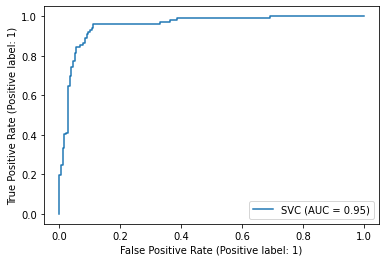

In [37]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model,x_train,y_train)

**Visualising the Test set results**

In [38]:
from sklearn.metrics import accuracy_score
test_score=accuracy_score(y_test,y_pred)*100
print("Test data score is :",test_score)


Test data score is : 90.83333333333333


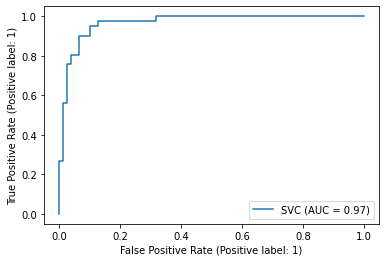

In [39]:
RocCurveDisplay.from_estimator(model,x_test,y_test)